In [2]:
import pandas as pd
import numpy as np

from sklearn.svm import SVC, SVR

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
df['Purchased'].unique()

array([0, 1], dtype=int64)

In [7]:
df.drop(['User ID','Gender'],axis = 1, inplace = True)

In [8]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


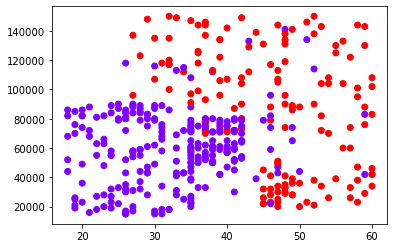

In [10]:
plt.scatter(df['Age'],df['EstimatedSalary'], c = df['Purchased'],cmap = 'rainbow')

In [11]:
x = df.drop('Purchased',axis = 1)
y = df['Purchased']

In [12]:
std_scaler = StandardScaler()
x_df = pd.DataFrame(std_scaler.fit_transform(x),columns= x.columns)
x_df
x_train, x_test, y_train, y_test = train_test_split(x_df,y,test_size=0.3, random_state=1, stratify=y)
# x_test

# Model Training

In [14]:
svc_model = SVC()
svc_model.fit(x_train, y_train)

SVC()

# Evaluation

In [16]:
# Testing Data Accuracy
y_pred = svc_model.predict(x_test)
acc_score = accuracy_score(y_test, y_pred)
print("Accuracy Score is :",acc_score)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n", cnf_matrix)

clf_report = classification_report(y_test, y_pred)

print("Classification report :\n",clf_report)

Accuracy Score is : 0.8666666666666667
Confusion Matrix :
 [[60 12]
 [ 4 44]]
Classification report :
               precision    recall  f1-score   support

           0       0.94      0.83      0.88        72
           1       0.79      0.92      0.85        48

    accuracy                           0.87       120
   macro avg       0.86      0.88      0.86       120
weighted avg       0.88      0.87      0.87       120



In [17]:
# Training Data accuracy
y_pred = svc_model.predict(x_train)
acc_score = accuracy_score(y_train, y_pred)
print("Accuracy Score is :",acc_score)

cnf_matrix = confusion_matrix(y_train, y_pred)
print("Confusion Matrix :\n", cnf_matrix)

clf_report = classification_report(y_train, y_pred)

print("Classification report :\n",clf_report)

Accuracy Score is : 0.9392857142857143
Confusion Matrix :
 [[175  10]
 [  7  88]]
Classification report :
               precision    recall  f1-score   support

           0       0.96      0.95      0.95       185
           1       0.90      0.93      0.91        95

    accuracy                           0.94       280
   macro avg       0.93      0.94      0.93       280
weighted avg       0.94      0.94      0.94       280



# Hyperparamter Tuning

In [26]:
svc_model = SVC(C = 4)
svc_model.get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [19]:
hyp = { 'C' : np.arange(1,100),
      'kernel' : ['linear', 'poly', 'rbf', 'sigmoid']}
svc_model = SVC()
gscv_model = GridSearchCV(svc_model,hyp,cv = 5)
gscv_model.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [20]:
gscv_model.best_estimator_

SVC(C=3)

In [21]:
gscv_model.best_params_

{'C': 3, 'kernel': 'rbf'}

In [22]:
svc_model = SVC(C = 3)
svc_model.fit(x_train, y_train)

SVC(C=3)

In [25]:
y_gscv_pred=gscv_model.predict(x_test)
acc_score = accuracy_score(y_test, y_gscv_pred)
print("Accuracy Score is :",acc_score)

Accuracy Score is : 0.8666666666666667


In [23]:
# Testing Data Accuracy
y_pred = svc_model.predict(x_test)
acc_score = accuracy_score(y_test, y_pred)
print("Accuracy Score is :",acc_score)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n", cnf_matrix)

clf_report = classification_report(y_test, y_pred)

print("Classification report :\n",clf_report)

Accuracy Score is : 0.8666666666666667
Confusion Matrix :
 [[60 12]
 [ 4 44]]
Classification report :
               precision    recall  f1-score   support

           0       0.94      0.83      0.88        72
           1       0.79      0.92      0.85        48

    accuracy                           0.87       120
   macro avg       0.86      0.88      0.86       120
weighted avg       0.88      0.87      0.87       120



In [24]:
# Training Data accuracy
y_pred = svc_model.predict(x_train)
acc_score = accuracy_score(y_train, y_pred)
print("Accuracy Score is :",acc_score)

cnf_matrix = confusion_matrix(y_train, y_pred)
print("Confusion Matrix :\n", cnf_matrix)

clf_report = classification_report(y_train, y_pred)

print("Classification report :\n",clf_report)

Accuracy Score is : 0.9392857142857143
Confusion Matrix :
 [[175  10]
 [  7  88]]
Classification report :
               precision    recall  f1-score   support

           0       0.96      0.95      0.95       185
           1       0.90      0.93      0.91        95

    accuracy                           0.94       280
   macro avg       0.93      0.94      0.93       280
weighted avg       0.94      0.94      0.94       280



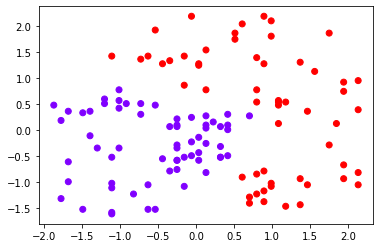

In [26]:
plt.scatter(x_test['Age'],x_test['EstimatedSalary'], c = y_gscv_pred,cmap = 'rainbow')